<a href="https://colab.research.google.com/github/amazingashis/Machine_Learning_Full_30_Day/blob/main/Support_Vector_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("/content/drive/My Drive/Data/Position_Salaries.csv")
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
X = dataset.iloc[:,1:2].values.astype(float)
y = dataset.iloc[:,2:3].values.astype(float)

print(X)
print(y)

[[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]
[[  45000.]
 [  50000.]
 [  60000.]
 [  80000.]
 [ 110000.]
 [ 150000.]
 [ 200000.]
 [ 300000.]
 [ 500000.]
 [1000000.]]


In [4]:

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

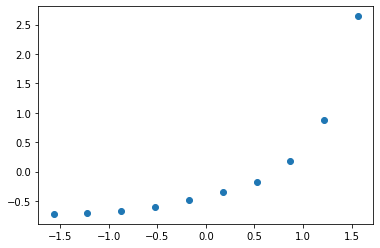

In [7]:
plt.scatter(X, y)
plt.show()

In [9]:
model = SVR(kernel = 'rbf')
model.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

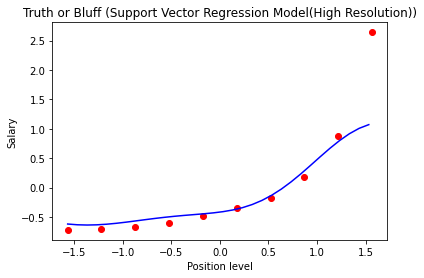

In [10]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = "red")
plt.plot(X_grid, model.predict(X_grid), color = "blue")
plt.title("Truth or Bluff (Support Vector Regression Model(High Resolution))")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

In [11]:
y_pred = sc_y.inverse_transform ((model.predict(sc_X.transform(np.array([[10]])))))
y_pred

array([557821.75899897])

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                   order='C')

In [13]:
#Training the Regressor Model with Polynomial features

from sklearn.linear_model import LinearRegression
polymodel = LinearRegression()
polymodel.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Salaries')

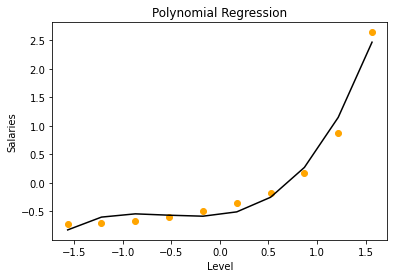

In [14]:
plt.scatter(X,y, color = 'orange')
plt.plot(X,polymodel.predict(poly.fit_transform(X)), color = 'black')
plt.title('Polynomial Regression')
plt.xlabel('Level')
plt.ylabel('Salaries')